###### 2020-11-05 목요일

# 12_비지도학습_[실습1]

### 목차

#### 1. 표준화

#### 2. 군집화

#### 3. 시각화

In [7]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### UCI에서 제공하는 고객데이터이다

In [2]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

In [46]:
sample_df = pd.read_csv(uci_path)

# 복사본 데이터프레임만들기
copy_df = sample_df.copy()

In [15]:
copy_df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [16]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


##### 사용하는 칼럼만 가져오자


In [54]:
df = copy_df.iloc[:, 2:8]

## 1. 표준화

##### df의 모든 Feature에 대하여 표준화를 진행하라

In [55]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()
stand.fit(df)
standard_df = pd.DataFrame(stand.transform(df), columns=df.columns)

standard_df.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461


## 2. 군집화

##### 위에서 만든 standard_df를 이용하여 군집화를 진행해보자

In [23]:
from sklearn.cluster import KMeans

In [71]:
# 군집을 3개로 했을때
clustering = KMeans(n_clusters = 6)
clustering.fit(standard_df)
clustering.labels_

clusting_df3 = standard_df.copy()
clusting_df3["K-mean's clustering"] = clustering.labels_

clusting_df3.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,K-mean's clustering
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,5
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,5
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0


## 3. 시각화

### (1) 표준화와 군집화가 진행된 데이터에서 Feature를 두 개만 골라서 시각화를 진행해보자

<AxesSubplot:xlabel='Grocery', ylabel='Frozen'>

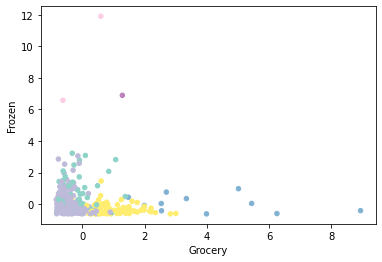

In [79]:
clusting_df3.plot(kind='scatter', x='Grocery', y='Frozen', c="K-mean's clustering", cmap='Set3', colorbar=False)

### (2) 표준화와 군집화가 진행된 데이터에 주성분이 2인 PCA를 적용하고 시각화까지 보여라

In [144]:
from sklearn.decomposition import PCA

def Do_PCA_cluster(df, principal, cluster):
    pca = PCA(n_components = principal)
    pca.fit(df)
    
    columns = ['PCA'+ str(i+1) for i in range(principal)]
    
    pca_df = pd.DataFrame(pca.transform(df), columns=columns)
    
    
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(pca_df)
    
    pca_df['cluster_id'] = kmeans.labels_
    
    return pca_df

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

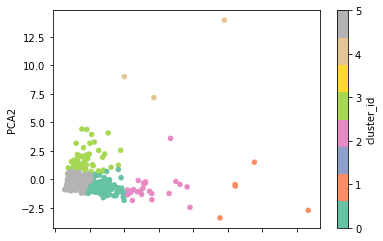

In [145]:
df = Do_PCA_cluster(standard_df, 2, 6)
df.plot(kind = 'scatter', x='PCA1', y='PCA2', c='cluster_id', cmap='Set2')